In [65]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy as sp
from typing import List, Tuple
from itertools import product, combinations
import matplotlib.patches as patches
import random
import itertools
import os

import SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3 as ss3
from importlib import reload

In [2]:
reload(ss3)

<module 'SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3' from 'c:\\Users\\mihbo\\Documents\\GitHub\\StochSim\\Assignment 3\\SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3.py'>

In [5]:
# Read data from JSON
data_path = "D:\\Msc Computational Science\\S01P02\\Stochastic Simulation"
run_data_file = os.path.join(data_path, 'run_data_sequential_12_30.json')
run_data = pd.read_json(run_data_file, orient='records')
run_data

,sim_id,local_sim_id,sort_mode,move_mode,cooling_function,markov_length,positions_over_time,forces_over_time,energies_over_time,total_energy_over_time,evaluation_number
0,0,0,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-2.598462447, 0.09057825950000001], [-3.922...","[[[0.2572254739, -0.293753624], [-1.9713355056...","[[1.8825281041, 1.8163968244, 1.74145382430000...","[21.6773530868, 23.6482122095, 17.8261050574, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
1,1,1,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-1.9200978038, 2.8456311897], [0.8902742096...","[[[-0.3451939101, 0.1463568891], [-3.732419436...","[[1.2617729547, 2.2084942778, 2.0347360669, 1....","[24.208583405, 19.5190107815, 19.2209158829, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
2,2,2,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-0.47157734170000004, -2.5159151982], [3.44...","[[[-0.0763292565, -0.15464822590000002], [-12....","[[1.52714742, 2.9997907757, 1.2412394887, 1.49...","[25.1842617485, 19.4360751744, 20.3881941864, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
3,3,3,normal,random cartesian,logarithmic_decay_cooling,12,"[[[0.1188174059, 1.0455422231], [-0.4066298187...","[[[-0.0169469532, 0.6396432067000001], [0.1676...","[[1.6418425461, 1.1483440893, 1.3893503756, 1....","[16.5964053633, 17.5824465859, 17.435911867, 1...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
4,4,4,normal,random cartesian,logarithmic_decay_cooling,12,"[[[-4.3517237581, 0.9281593939], [2.3975550636...","[[[-0.5363829378, -0.0400140393], [0.078177652...","[[1.2315894832, 1.4561761404, 2.0486337048, 1....","[22.9333283348, 22.2747223366, 18.4326076942, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
5395,5395,25,random,blend,parametric_exponential_decay_cooling,360,"[[[2.0020174059, 0.5916201037000001], [1.86006...","[[[0.0933697532, -0.3903869178], [0.2749273715...","[[1.339279065, 1.1695160759, 1.1787983801, 1.0...","[17.043374859, 38.9759279606, 33.3603618358, 3...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
5396,5396,26,random,blend,parametric_exponential_decay_cooling,360,"[[[-3.4641749768, 3.5281361837], [2.6684013456...","[[[-0.4269752076, 0.7487097217], [0.6703409935...","[[1.3086812694, 1.4097862722, 2.1896215675, 1....","[25.1413904432, 40.4400910251, 34.4606124903, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
5397,5397,27,random,blend,parametric_exponential_decay_cooling,360,"[[[-1.116412583, 1.3026840511], [-2.0055756774...","[[[1.2544503665, 0.6792244068000001], [-4.2187...","[[1.985432077, 2.5827462214, 1.820863213, 2.59...","[23.5451480621, 33.7400581446, 32.1461205198, ...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."
5398,5398,28,random,blend,parametric_exponential_decay_cooling,360,"[[[-2.3385437362, -0.8977822361000001], [1.000...","[[[-0.0422437312, 0.1482148463], [-2.555707467...","[[1.427390524, 2.065010104, 1.1227540183, 1.15...","[16.8775842846, 34.238232379, 27.8989742213, 3...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1..."


In [ ]:
run_data = pd.read_json(f'run_data_sequential_12_10.json', orient='records')
run_data

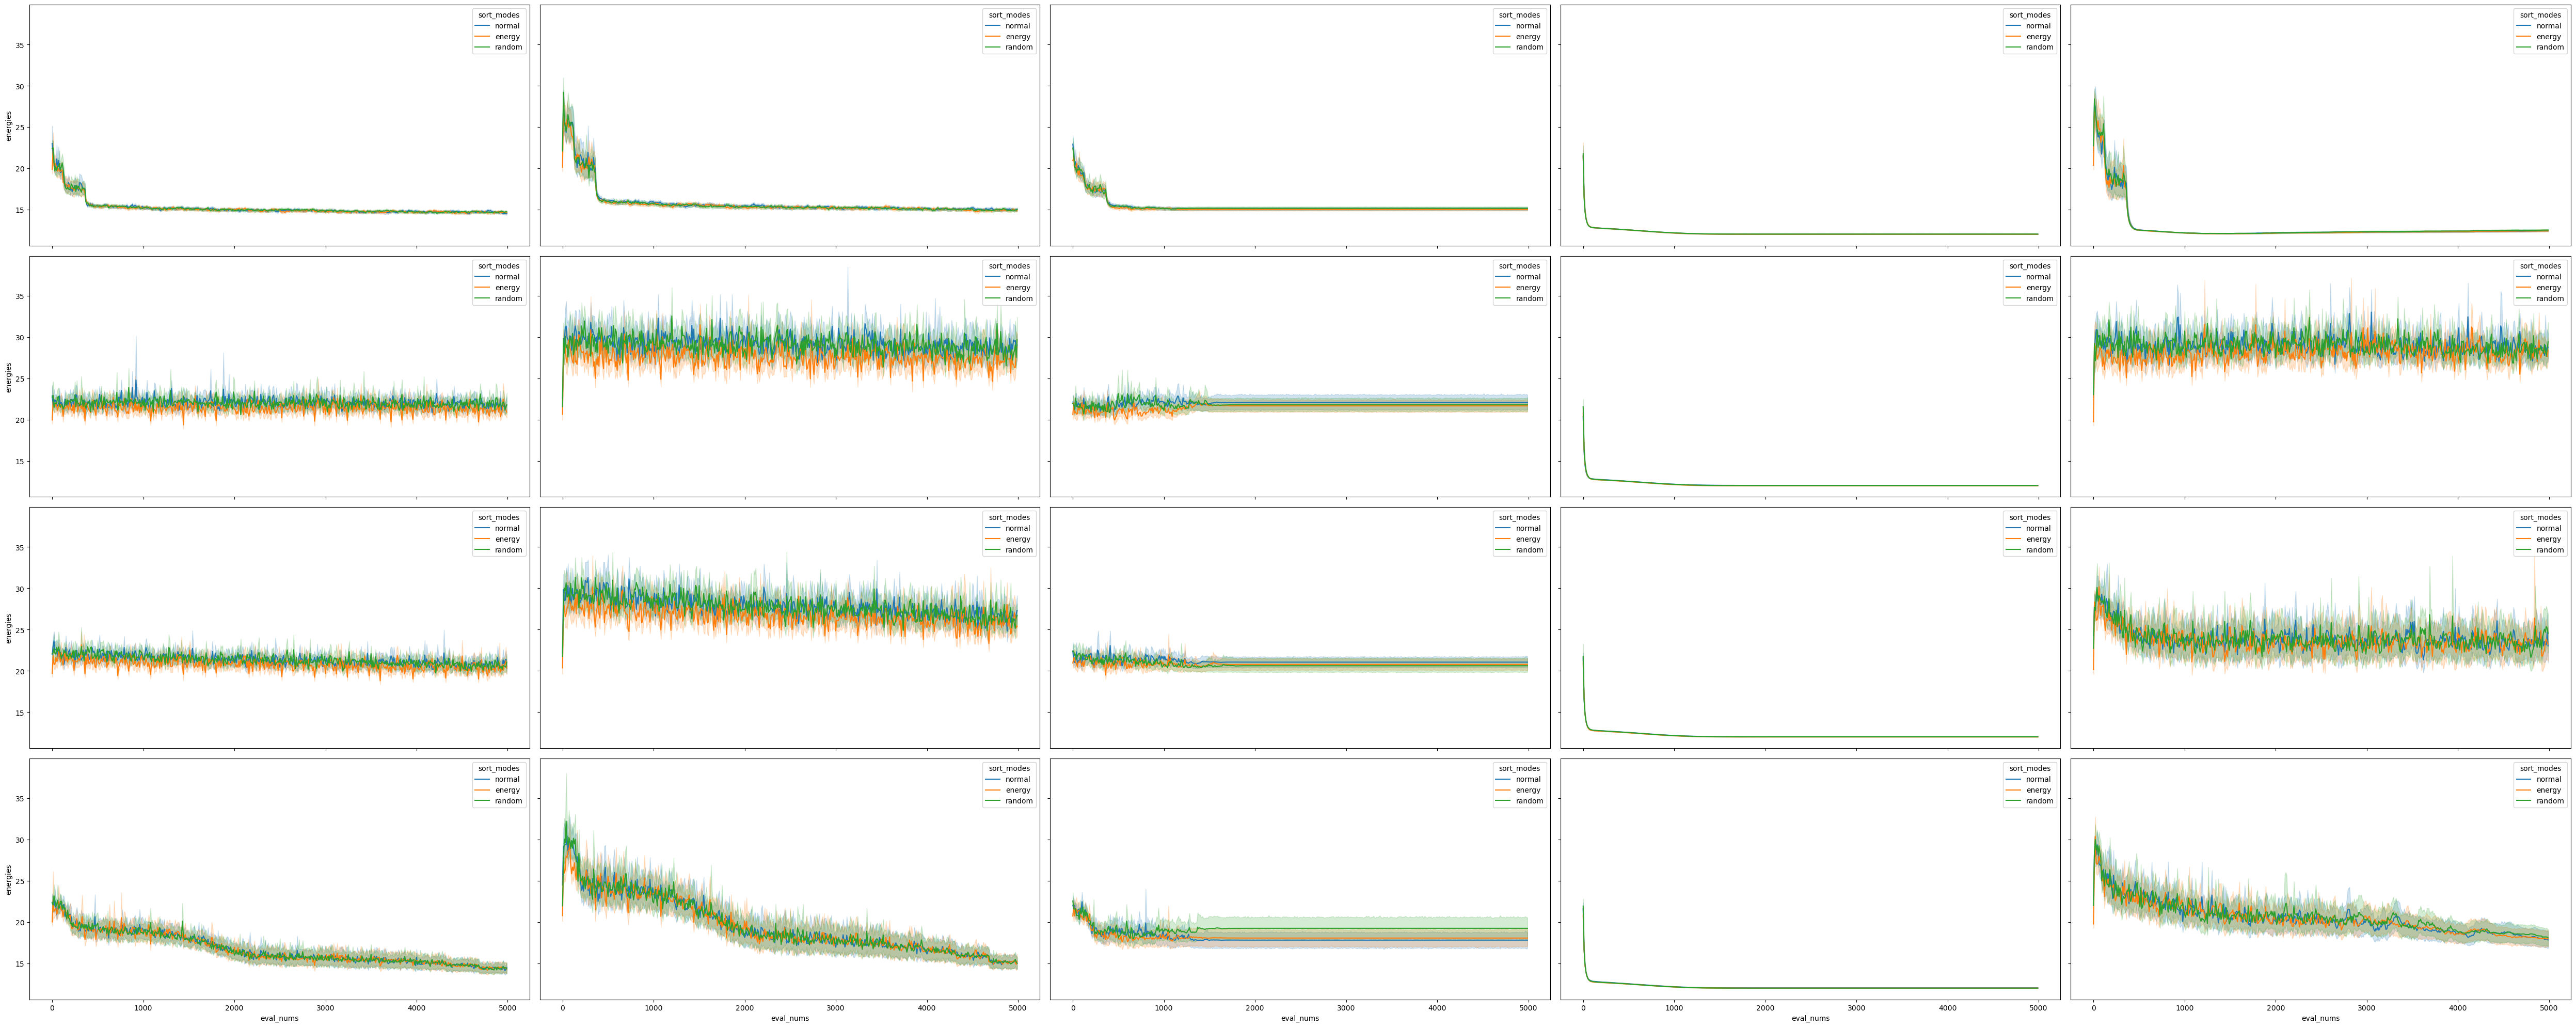

In [63]:
n_cf = run_data['cooling_function'].unique().shape[0]
n_mm = run_data['move_mode'].unique().shape[0]

fig, axs = plt.subplots(n_cf, n_mm, sharex=True, sharey=True)
fig.set_size_inches(n_mm*10, n_cf*5)

for i, cooling_function in enumerate(run_data['cooling_function'].unique()):
    for j, move_mode in enumerate(run_data['move_mode'].unique()):
        df_filtered = run_data[(run_data['cooling_function'] == cooling_function) & (run_data['move_mode'] == move_mode)]
        # Print unique values for evaluation number
        eval_nums = np.array([arr for arr in df_filtered['evaluation_number'].to_numpy()])[:,:-1]
        energies =np.array([arr for arr in df_filtered['total_energy_over_time'].to_numpy()])
        # Match sort modes to energies
        sort_modes = np.tile(df_filtered['sort_mode'].to_numpy(), (energies.shape[1], 1)).T

        # Flatten 2D numpy arrays into 1D arrays
        eval_nums_flat = eval_nums.flatten()
        energies_flat = energies.flatten()
        sort_modes_flat = sort_modes.flatten()

        # Create a DataFrame from 1D arrays
        df_plot = pd.DataFrame({
            'eval_nums': eval_nums_flat,
            'energies': energies_flat,
            'sort_modes': sort_modes_flat
        })
        
        sns.lineplot(data=df_plot, x='eval_nums', y='energies', hue='sort_modes', ax=axs[i, j])

plt.tight_layout()
plt.show()

## Parameter Influence Plots

===Convergence for different cooling functions===
[['logarithmic_decay_cooling' 'logarithmic_decay_cooling'
  'logarithmic_decay_cooling' ... 'logarithmic_decay_cooling'
  'logarithmic_decay_cooling' 'logarithmic_decay_cooling']
 ['logarithmic_decay_cooling' 'logarithmic_decay_cooling'
  'logarithmic_decay_cooling' ... 'logarithmic_decay_cooling'
  'logarithmic_decay_cooling' 'logarithmic_decay_cooling']
 ['logarithmic_decay_cooling' 'logarithmic_decay_cooling'
  'logarithmic_decay_cooling' ... 'logarithmic_decay_cooling'
  'logarithmic_decay_cooling' 'logarithmic_decay_cooling']
 ...
 ['parametric_exponential_decay_cooling'
  'parametric_exponential_decay_cooling'
  'parametric_exponential_decay_cooling' ...
  'parametric_exponential_decay_cooling'
  'parametric_exponential_decay_cooling'
  'parametric_exponential_decay_cooling']
 ['parametric_exponential_decay_cooling'
  'parametric_exponential_decay_cooling'
  'parametric_exponential_decay_cooling' ...
  'parametric_exponential_deca

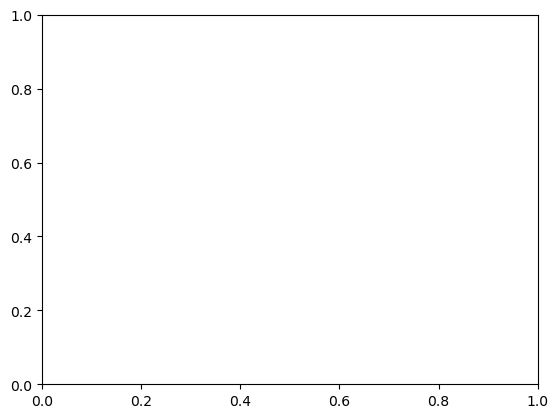

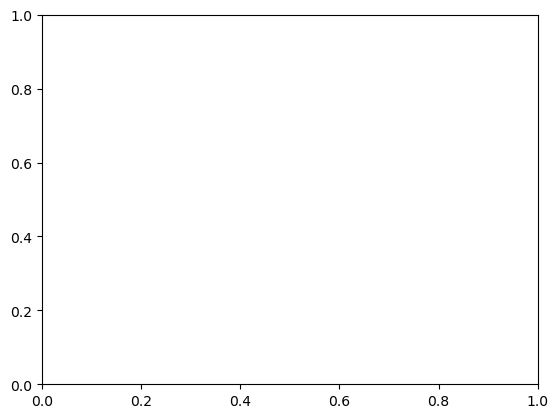

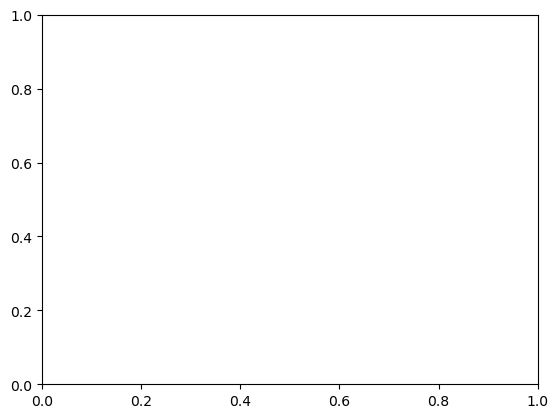

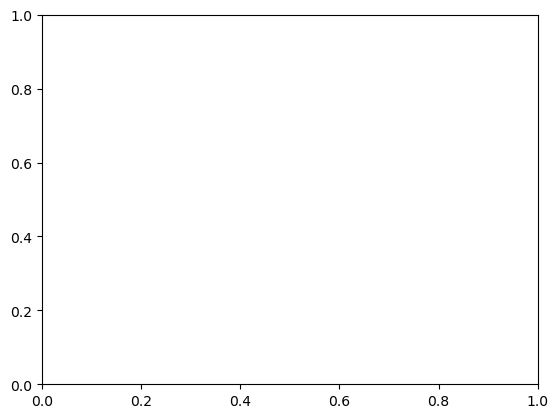

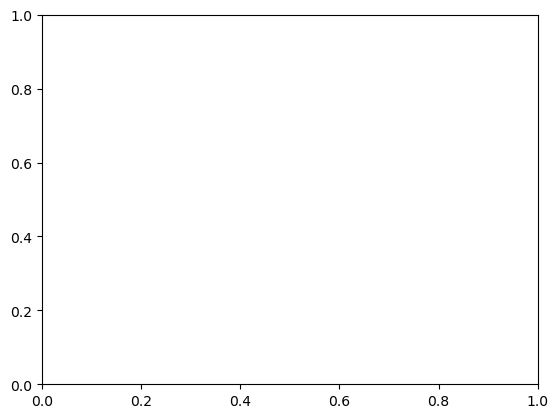

In [87]:
# Create plots for comparing convergence of different cooling functions
print("===Convergence for different cooling functions===")
run_data_subset = run_data[(run_data['markov_length'] == 360) & (run_data['sort_mode'] == 'random')]

for mm in run_data_subset['move_mode'].unique():
    fig, ax = plt.subplots()

    df_filtered = run_data_subset[run_data_subset['move_mode'] == mm]
    eval_nums = np.array([arr for arr in df_filtered['evaluation_number'].to_numpy()])[:,:-1]
    energies =np.array([arr for arr in df_filtered['total_energy_over_time'].to_numpy()])
    
    # Match sort modes to energies
    cooling_modes = np.tile(df_filtered['cooling_function'].to_numpy(), (energies.shape[1], 1)).T
    print(cooling_modes)

    # Flatten 2D numpy arrays into 1D arrays
    # eval_nums_flat = eval_nums.flatten()
    # energies_flat = energies.flatten()
    # cooling_modes_flat = cooling_modes.flatten()

    # # Create a DataFrame from 1D arrays
    # df_plot = pd.DataFrame({
    #     'Evaluations': eval_nums_flat,
    #     'Energies': energies_flat,
    #     'Cooling': cooling_modes_flat
    # })
    
    # sns.lineplot(data=df_plot, x='Evaluations', y='Energies', hue='Cooling', ax=ax)

    # # Format y-axis ticks as integers
    # ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    # ax.set_title(f'Convergence for {mm} move mode')

    # ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Cooling Function')
    # plt.show()

# Create plots for comparing convergence for different markov lengths
# print("===Convergence for different markov lengths===")
# run_data_subset = run_data[(run_data['cooling_function'] == 'parametric_exponential_decay_cooling') & (run_data['sort_mode'] == 'random')]

# for mm in run_data_subset['move_mode'].unique():
#     fig, ax = plt.subplots()

#     df_filtered = run_data_subset[run_data_subset['move_mode'] == mm]
#     eval_nums = np.array([arr for arr in df_filtered['evaluation_number'].to_numpy()])[:,:-1]
#     energies =np.array([arr for arr in df_filtered['total_energy_over_time'].to_numpy()])
    
#     # Match sort modes to energies
#     markov_lengths = np.tile(df_filtered['markov_length'].to_numpy(), (energies.shape[1], 1)).T

#     # Flatten 2D numpy arrays into 1D arrays
#     eval_nums_flat = eval_nums.flatten()
#     energies_flat = energies.flatten()
#     markov_lengths_flat = markov_lengths.flatten()

#     # Create a DataFrame from 1D arrays
#     df_plot = pd.DataFrame({
#         'Evaluations': eval_nums_flat,
#         'Energies': energies_flat,
#         'MC Length': markov_lengths_flat
#     })
    
#     sns.lineplot(data=df_plot, x='Evaluations', y='Energies', hue='MC Length', ax=ax)

#     # Format y-axis ticks as integers
#     ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
#     ax.set_title(f'Convergence for {mm} move mode')

#     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='MC Length')
#     plt.show()

# # Create plots for comparing convergence for different sort modes
# print("===Convergence for different sort modes===")
# run_data_subset = run_data[(run_data['cooling_function'] == 'parametric_exponential_decay_cooling') & (run_data['markov_length'] == 360)]

# for mm in run_data_subset['move_mode'].unique():
#     fig, ax = plt.subplots()

#     df_filtered = run_data_subset[run_data_subset['move_mode'] == mm]
#     eval_nums = np.array([arr for arr in df_filtered['evaluation_number'].to_numpy()])[:,:-1]
#     energies =np.array([arr for arr in df_filtered['total_energy_over_time'].to_numpy()])
    
#     # Match sort modes to energies
#     sort_modes = np.tile(df_filtered['sort_mode'].to_numpy(), (energies.shape[1], 1)).T

#     # Flatten 2D numpy arrays into 1D arrays
#     eval_nums_flat = eval_nums.flatten()
#     energies_flat = energies.flatten()
#     sort_modes_flat = sort_modes.flatten()

#     # Create a DataFrame from 1D arrays
#     df_plot = pd.DataFrame({
#         'Evaluations': eval_nums_flat,
#         'Energies': energies_flat,
#         'MC Sorting': sort_modes_flat
#     })
    
#     sns.lineplot(data=df_plot, x='Evaluations', y='Energies', hue='MC Sorting', ax=ax)

#     # Format y-axis ticks as integers
#     ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
#     ax.set_title(f'Convergence for {mm} move mode')

#     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='MC Sorting')
#     plt.show()